Objective: Make a selection paintings for the exhibition catalogue to be selected from Wikidata and rendered multi-format in Quarto.

The below Python code uses SPARQLWrapper to retrieve data from Wikidata based on a SPARQL query.

Wikidata link: [http://www.wikidata.org/entity/Q104412992](http://www.wikidata.org/entity/Q104412992)

Creator: William Guy Wall

Inventory number: 54.90.301

Made from material(s): 

Location: Metropolitan Museum of Art

Genre(s): landscape art

Depicts: river, boat, landscape art



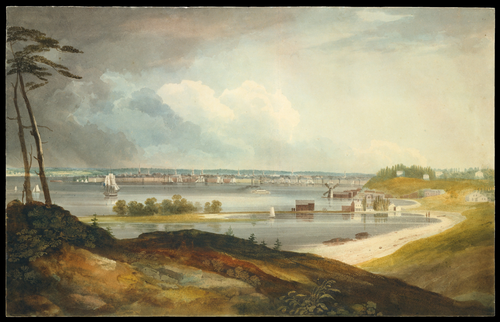




Wikidata link: [http://www.wikidata.org/entity/Q116444817](http://www.wikidata.org/entity/Q116444817)

Made from material(s): 

Genre(s): landscape art

Depicts: river, mountain, waterfall




Wikidata link: [http://www.wikidata.org/entity/Q16667013](http://www.wikidata.org/entity/Q16667013)

Creator: Arkhip Kuindzhi

Inventory number: 1974.100

Made from material(s): oil paint, canvas

Location: Metropolitan Museum of Art

Genre(s): landscape art

Depicts: Sun, river, evening, Dnieper, landscape art



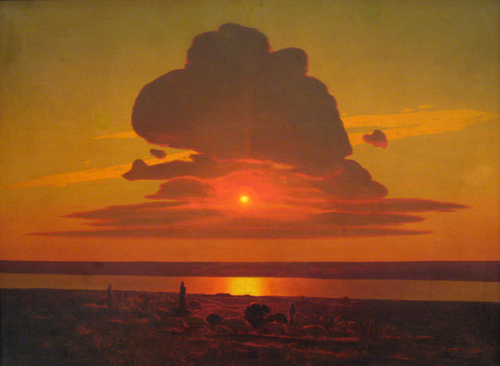




Wikidata link: [http://www.wikidata.org/entity/Q1913390](http://www.wikidata.org/entity/Q1913390)

Creator: Thomas Eakins

Inventory number: 34.92

Made from material(s): oil paint

Location: Metropolitan Museum of Art

Genre(s): portrait, landscape art

Depicts: house, river, man, tree, bridge, boat, landscape, rowing



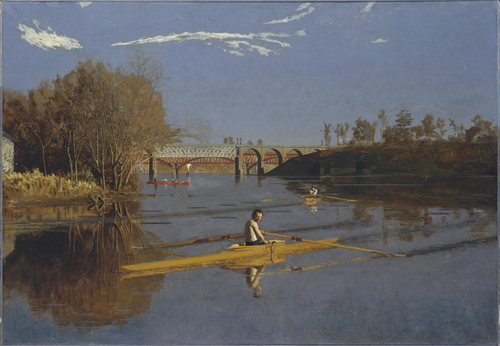




Wikidata link: [http://www.wikidata.org/entity/Q19905131](http://www.wikidata.org/entity/Q19905131)

Creator: Claude Monet

Inventory number: 29.100.110

Made from material(s): oil paint, canvas

Location: Metropolitan Museum of Art

Genre(s): 

Depicts: river, tree



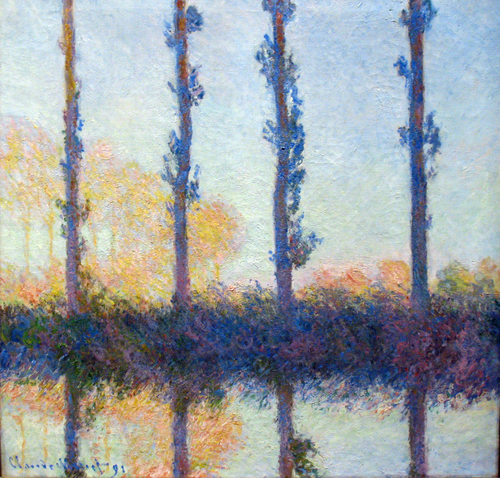




Wikidata link: [http://www.wikidata.org/entity/Q19905268](http://www.wikidata.org/entity/Q19905268)

Creator: Georges Seurat

Inventory number: 2002.62.3

Made from material(s): oil paint, canvas

Location: Metropolitan Museum of Art

Genre(s): landscape art

Depicts: house, river, tree, boat



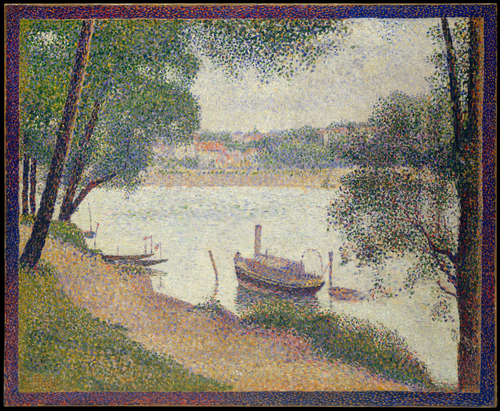




Wikidata link: [http://www.wikidata.org/entity/Q19905309](http://www.wikidata.org/entity/Q19905309)

Creator: Gustave Courbet

Inventory number: 29.100.122

Made from material(s): oil paint, canvas

Location: Metropolitan Museum of Art

Genre(s): landscape art

Depicts: river



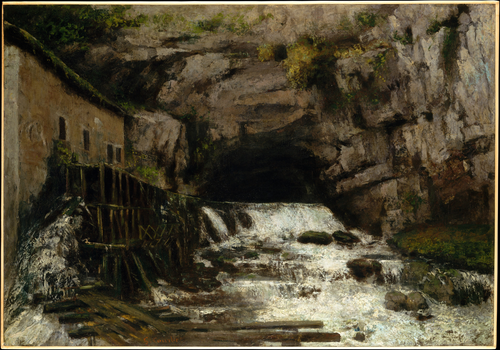

In [1]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

# query URL https://query.wikidata.org/#SELECT%20%0A%20%20%3Fpainting%20%0A%20%20%3FcreatorLabel%0A%20%20%3Fimage%0A%20%20%3Fcopyright_status%20%0A%20%20%3Finventory_number%20%0A%20%20%28GROUP_CONCAT%28DISTINCT%20%3Fmade_from_materialLabel%3B%20separator%3D%22%2C%20%22%29%20AS%20%3Fmade_from_materialLabels%29%20%0A%20%20%3FlocationLabel%0A%20%20%28GROUP_CONCAT%28DISTINCT%20%3FgenreLabel%3B%20separator%3D%22%2C%20%22%29%20AS%20%3FgenreLabels%29%20%0A%20%20%28GROUP_CONCAT%28DISTINCT%20%3FdepictsLabel%3B%20separator%3D%22%2C%20%22%29%20AS%20%3FdepictsLabels%29%20%0A%20%20%3Fmain_subjectLabel%0AWHERE%20%7B%0A%20%20%3Fpainting%20wdt%3AP31%20wd%3AQ3305213%3B%20%20%23%20Instance%20of%20%22painting%22%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP195%20wd%3AQ160236%3B%20%20%20%23%20Part%20of%20the%20Metropolitan%20Museum%20of%20Art%20collection%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP180%20wd%3AQ4022.%20%20%20%20%23%20Depicts%20%27river%27%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP170%20%3Fcreator.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP18%20%3Fimage.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP6216%20%3Fcopyright_status.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP571%20%3Finception.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP217%20%3Finventory_number.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP186%20%3Fmade_from_material.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP276%20%3Flocation.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP136%20%3Fgenre.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP180%20%3Fdepicts.%20%7D%0A%20%20OPTIONAL%20%7B%20%3Fpainting%20wdt%3AP921%20%3Fmain_subject.%20%7D%0A%0A%20%20SERVICE%20wikibase%3Alabel%20%7B%0A%20%20%20%20bd%3AserviceParam%20wikibase%3Alanguage%20%22%5BAUTO_LANGUAGE%5D%2Cen%22.%0A%20%20%20%20%3Fcreator%20rdfs%3Alabel%20%3FcreatorLabel.%0A%20%20%20%20%3Fmade_from_material%20rdfs%3Alabel%20%3Fmade_from_materialLabel.%0A%20%20%20%20%3Flocation%20rdfs%3Alabel%20%3FlocationLabel.%0A%20%20%20%20%3Fgenre%20rdfs%3Alabel%20%3FgenreLabel.%0A%20%20%20%20%3Fdepicts%20rdfs%3Alabel%20%3FdepictsLabel.%0A%20%20%20%20%3Fmain_subject%20rdfs%3Alabel%20%3Fmain_subjectLabel.%0A%20%20%7D%0A%7D%0AGROUP%20BY%20%3Fpainting%20%3FcreatorLabel%20%3Fimage%20%3Fcopyright_status%20%3Finventory_number%20%3Fmade_from_materialLabels%20%3FlocationLabel%20%3FgenreLabels%20%3FdepictsLabels%20%3Fmain_subjectLabel%0AORDER%20BY%20%3Fpainting%0ALIMIT%2027%0A

import sys
from SPARQLWrapper import SPARQLWrapper, JSON
from PIL import Image
import requests

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT 
  ?painting 
  ?creatorLabel
  ?image
  ?copyright_status 
  ?inventory_number 
  (GROUP_CONCAT(DISTINCT ?made_from_materialLabel; separator=", ") AS ?made_from_materialLabels) 
  ?locationLabel
  (GROUP_CONCAT(DISTINCT ?genreLabel; separator=", ") AS ?genreLabels) 
  (GROUP_CONCAT(DISTINCT ?depictsLabel; separator=", ") AS ?depictsLabels) 
  ?main_subjectLabel
WHERE {
  ?painting wdt:P31 wd:Q3305213;  # Instance of "painting"
            wdt:P195 wd:Q160236;  # Bavarian S C Q812285;
            wdt:P180 wd:Q4022.   # Venus wd:Q47652.
  OPTIONAL { ?painting wdt:P170 ?creator. }
  OPTIONAL { ?painting wdt:P18 ?image. }
  OPTIONAL { ?painting wdt:P6216 ?copyright_status. }
  OPTIONAL { ?painting wdt:P571 ?inception. }
  OPTIONAL { ?painting wdt:P217 ?inventory_number. }
  OPTIONAL { ?painting wdt:P186 ?made_from_material. }
  OPTIONAL { ?painting wdt:P276 ?location. }
  OPTIONAL { ?painting wdt:P136 ?genre. }
  OPTIONAL { ?painting wdt:P180 ?depicts. }
  OPTIONAL { ?painting wdt:P921 ?main_subject. }

  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en".
    ?creator rdfs:label ?creatorLabel.
    ?made_from_material rdfs:label ?made_from_materialLabel.
    ?location rdfs:label ?locationLabel.
    ?genre rdfs:label ?genreLabel.
    ?depicts rdfs:label ?depictsLabel.
    ?main_subject rdfs:label ?main_subjectLabel.
  }
}
GROUP BY ?painting ?creatorLabel ?image ?copyright_status ?inventory_number ?made_from_materialLabels ?locationLabel ?genreLabels ?depictsLabels ?main_subjectLabel
ORDER BY ?painting
LIMIT 7
"""

# SUBROUTINES

def get_delay(date):
    try:
        date = datetime.datetime.strptime(date, '%a, %d %b %Y %H:%M:%S GMT')
        timeout = int((date - datetime.datetime.now()).total_seconds())
    except ValueError:
        timeout = int(date)
    return timeout

def get_image(url, headers):
    r = requests.get(url, headers=headers, stream=True)
    if r.status_code == 200:
        im = Image.open(r.raw)
        return im
    if r.status_code == 500:
        return None
    if r.status_code == 403:
        return None
    if r.status_code == 429:
        timeout = get_delay(r.headers['retry-after'])
        print('Timeout {} m {} s'.format(timeout // 60, timeout % 60))
        time.sleep(timeout)
        get_image(url, headers)

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

# MAIN PROGRAM

results = get_results(endpoint_url, query)


for item in results["results"]["bindings"]:
    print('Wikidata link: ' + '[' + item['painting']['value'] + ']' + '(' + item['painting']['value'] + ')' + '\n')
    if item.get("creatorLabel") is not None:
        print('Creator: ' + item['creatorLabel']['value'] + '\n')
    if item.get("inventory_number") is not None:
        print('Inventory number: ' + item['inventory_number']['value'] + '\n')
    if item.get("made_from_materialLabels") is not None:
        print('Made from material(s): ' + item['made_from_materialLabels']['value'] + '\n')
    if item.get("locationLabel") is not None:
        print('Location: ' + item['locationLabel']['value'] + '\n')
    if item.get("genreLabels") is not None:
        print('Genre(s): ' + item['genreLabels']['value'] + '\n')
    if item.get("depictsLabels") is not None:
        print('Depicts: ' + item['depictsLabels']['value'] + '\n')

    if item.get("image") is not None:
        # get image from image URL and display resized version
        image_url=item['image']['value']
        headers = {'User-Agent': "WDQS-example Python/0.0"}
        im = get_image(image_url, headers)
        im.thumbnail((500, 500), Image.Resampling.LANCZOS)
        display(im)
    
    print('\n\n')
